In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  name=fn
df = pd.read_csv(name, sep=",")

Saving Titanic (1).csv to Titanic (1).csv


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Verificar cual es el Target u Objetivo del análisis de datos. Survived.

Verificar la cantidad de valores nulos dentro del conjunto de datos. Nan o Null

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

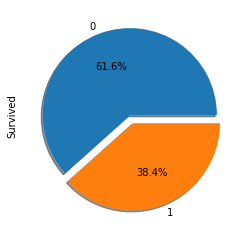

In [ ]:
df['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0, 0.1), shadow = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


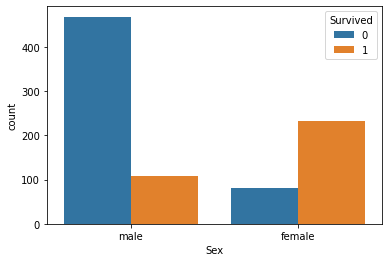

In [ ]:
sns.countplot('Sex', hue='Survived', data=df)

Tipos de Variables

Categóricas Nominales por ejemplo el sexo

In [ ]:
df['PassengerId'].count()

891

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Gráfico con el promedio de mujeres y hombres que son sobreviven

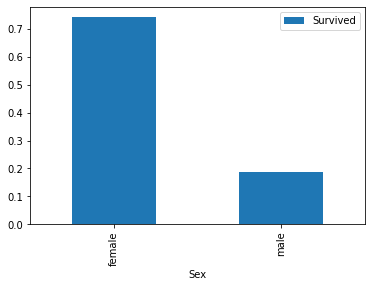

In [ ]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

Categoricas Ordinales por ejemplo la Clase: 1°, 2° y 3°

In [ ]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


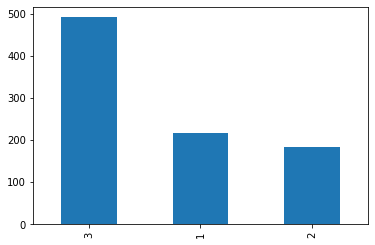

In [ ]:
df['Pclass'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


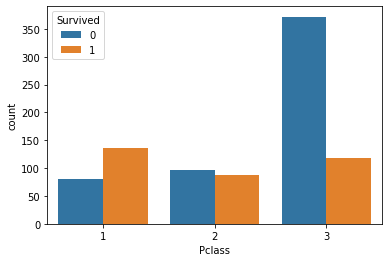

In [ ]:
sns.countplot('Pclass', hue='Survived', data=df)
plt.show()

Analizar la tasa de supervivencia segun sexo y clase

In [ ]:
pd.crosstab([df['Sex'], df['Survived']], df['Pclass'])

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


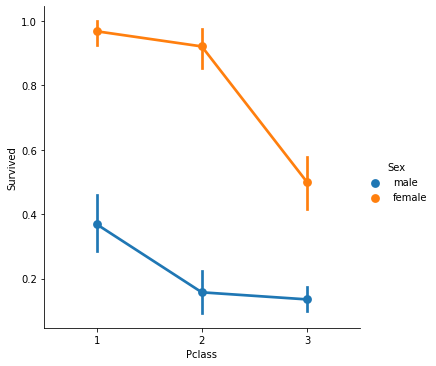

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df)
plt.show()

Numericas continuas con el valor del pasaje

In [ ]:
print("El pasaje mas caro: ", df['Fare'].max())
print("El pasaje mas barato: ", df['Fare'].min())

El pasaje mas caro:  512.3292
El pasaje mas barato:  0.0


In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


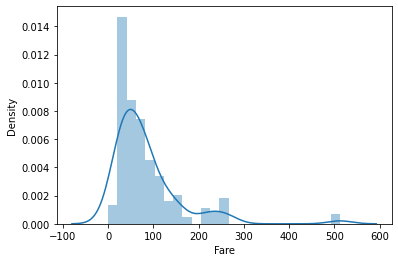

In [ ]:
sns.distplot(df[df['Pclass'] == 1]['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


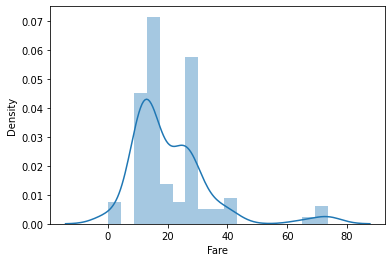

In [ ]:
sns.distplot(df[df['Pclass'] == 2 ]['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


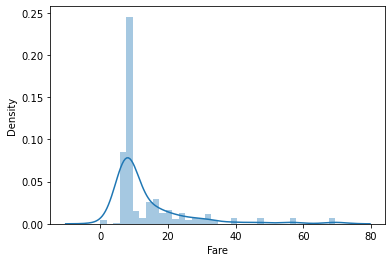

In [ ]:
sns.distplot(df[df['Pclass'] == 3]['Fare'])

Limpieza de Datos


1.   Convertir algunas variables continuas en rangos
2.   Convertir valores string en valores numéricos
3.   Eliminar características innecesarias
4.   Corregir valores nulos.



1. Convertir algunas variables continuas en rangos

In [ ]:
# 1.-Convertir variables continuas en rangos. (Normalización)
df['rango_de_edad'] = 0
df.loc[df['Age'] <= 16, 'rango_de_edad' ] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <=32), 'rango_de_edad' ] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <=48), 'rango_de_edad' ] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <=64), 'rango_de_edad' ] = 3
df.loc[ df['Age'] > 64, 'rango_de_edad' ] = 4

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


Numero de pasajeros por banda de edad

In [ ]:
df['rango_de_edad'].value_counts()

1    346
0    277
2    188
3     69
4     11
Name: rango_de_edad, dtype: int64

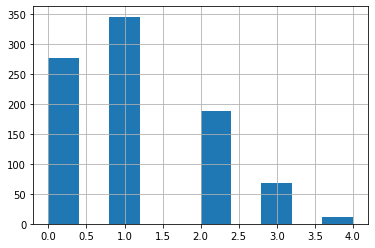

In [ ]:
df['rango_de_edad'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


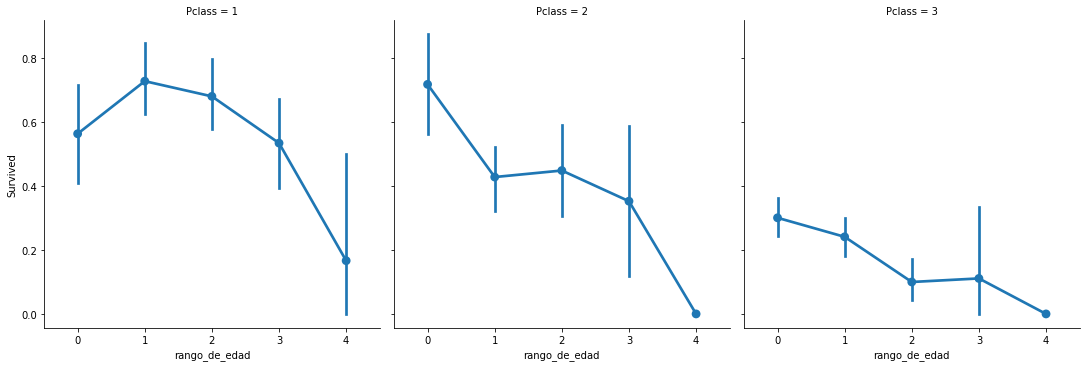

In [ ]:
sns.factorplot('rango_de_edad', 'Survived', data = df, col = 'Pclass')

Carácteristicas de los pasajes

In [ ]:
df['rango_pasaje'] = pd.qcut(df['Fare'], 4)
df.groupby(['rango_pasaje'])['Survived'].mean()

rango_pasaje
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [ ]:
df['categoria_pasaje'] = 0
df.loc[df['Fare'] <= 7.91, 'categoria_pasaje'] = 0
df.loc[ (df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'categoria_pasaje'] = 1
df.loc[ (df['Fare'] > 14.454) & (df['Fare'] <= 31.0), 'categoria_pasaje'] = 2
df.loc[ (df['Fare'] > 31.0) & (df['Fare'] <= 512.329), 'categoria_pasaje'] = 3

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


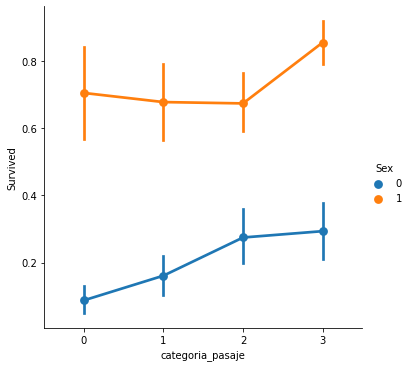

In [ ]:
sns.factorplot('categoria_pasaje', 'Survived', data=df, hue='Sex')

2.- Convertir valores String en valores numericos

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,"(7.91, 14.454]",1


In [ ]:
df['Sex'].replace(['male', 'female'], [0,1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

In [ ]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,rango_de_edad,rango_pasaje,categoria_pasaje
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1


Eliminar características innecesarias\
1.- Passengerid: no se puede clasificar.\
2.- Nombre: no se puede convertir a ningun valor categorico.\
3.- Edad: Tenemos rango de edad.\
4.- Ticket: Es una cadena aleatoria que no se puede clasificar.\
5.- Pasaje: Se reemplaza por Categoria del pasaje.\
6.- Cabina: Muchos valores de NaN y muchos pasajeros tienen varias cabinas.\
7.- Rango_Pasaje: se reemplaza por categoria de pasaje.

In [ ]:
df.drop(['Name', 'Age', 'Ticket', 'Ticket', 'Ticket', 'Cabin', 'rango_pasaje'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,rango_de_edad,categoria_pasaje
0,1,0,3,0,1,0,7.2500,0.0,1,0
1,2,1,1,1,1,0,71.2833,1.0,2,3
2,3,1,3,1,0,0,7.9250,0.0,1,1


Tratamientos de Datos Nulos:\
1.-Podemos eliminarlos.\
2.-Podemos dejarlos como estan.\
3.-Podemos deducirlos.

In [ ]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Fare                0
Embarked            2
rango_de_edad       0
categoria_pasaje    0
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,rango_de_edad,categoria_pasaje
61,62,1,1,1,0,0,80.0,NaN,2,3
829,830,1,1,1,0,0,80.0,NaN,3,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


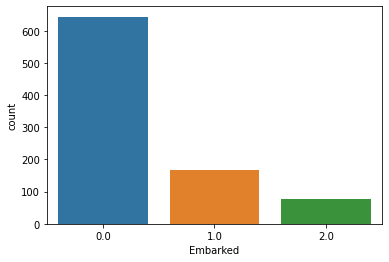

In [ ]:
sns.countplot('Embarked', data=df)

In [ ]:
df['Embarked'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
rango_de_edad       0
categoria_pasaje    0
dtype: int64

In [ ]:
#Exportamos nuestro archivo a csv
df.to_csv("titanic_limpio.csv")

In [ ]:
df.to_excel("titanic_limpio_excel.xlsx")